# Obesity

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

" https://www.semanticscholar.org/paper/Estimation-of-Obesity-Levels-with-a-Trained-Neural-Ya%C4%9F%C4%B1n-G%C3%BCl%C3%BC/2c1eab51db154493d225c8b86ba885bbaf147a2c "

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Gender:** Feature, Categorical, "Gender"

**Age :** Feature, Continuous, "Age"

**Height:** Feature, Continuous

**Weight:** Feature Continuous

**family_history_with_overweight:** Feature, Binary, " Has a family member suffered or suffers from overweight? "

**FAVC :** Feature, Binary, " Do you eat high caloric food frequently? "

**FCVC :** Feature, Integer, " Do you usually eat vegetables in your meals? "

**NCP :** Feature, Continuous, " How many main meals do you have daily? "

**CAEC :** Feature, Categorical, " Do you eat any food between meals? "

**SMOKE :** Feature, Binary, " Do you smoke? "

**CH2O:** Feature, Continuous, " How much water do you drink daily? "

**SCC:** Feature, Binary, " Do you monitor the calories you eat daily? "

**FAF:** Feature, Continuous, " How often do you have physical activity? "

**TUE :** Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

**CALC :** Feature, Categorical, " How often do you drink alcohol? "

**MTRANS :** Feature, Categorical, " Which transportation do you usually use? "

**NObeyesdad :** Target, Categorical, "Obesity level"

In [5]:
import warnings
warnings.filterwarnings("ignore")

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from scipy import stats

import plotly.graph_objects as go
import plotly.express as px

# import optuna
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score, make_scorer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
# from optuna.samplers import TPESampler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, \
RandomizedSearchCV,StratifiedKFold
from sklearn.feature_selection import SelectFromModel, RFE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier, plot_importance

# from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots

# init_notebook_mode(connected=True)

In [6]:
plt.style.use('ggplot')

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/obedity prediction/ObesityDataSet_raw_and_data_sinthetic.csv')
labels = list(df["NObeyesdad"].unique())
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.shape

(2111, 17)

So in this project we have 2111 samples with 16 features and one target (NObeyesdad)

In [9]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

## Plot of Continuous Features

In [16]:
df2 = df.copy()

In [17]:
######################################## manual feature encoding ####################################################
df2.loc[df2['NObeyesdad'] == 'Normal_Weight', 'NObeyesdad'] = 0
df2.loc[df2['NObeyesdad'] == 'Overweight_Level_I', 'NObeyesdad'] = 1
df2.loc[df2['NObeyesdad'] == 'Overweight_Level_II', 'NObeyesdad'] = 2
df2.loc[df2['NObeyesdad'] == 'Obesity_Type_I', 'NObeyesdad'] = 3
df2.loc[df2['NObeyesdad'] == 'Insufficient_Weight', 'NObeyesdad'] = 4
df2.loc[df2['NObeyesdad'] == 'Obesity_Type_II', 'NObeyesdad'] = 5
df2.loc[df2['NObeyesdad'] == 'Obesity_Type_III', 'NObeyesdad'] = 6

        ###################### data to number #################

        # Gender

df2.loc[df2['Gender'] == 'Female', 'Gender'] = 0
df2.loc[df2['Gender'] == 'Male', 'Gender'] = 1

        # family_history_with_overweight

df2.loc[df2['family_history_with_overweight'] == 'no', 'family_history_with_overweight'] = 0
df2.loc[df2['family_history_with_overweight'] == 'yes', 'family_history_with_overweight'] = 1

        # FAVC

df2.loc[df2['FAVC'] == 'no', 'FAVC'] = 0
df2.loc[df2['FAVC'] == 'yes', 'FAVC'] = 1

        # CAEC

df2.loc[df2['CAEC'] == 'no', 'CAEC'] = 0
df2.loc[df2['CAEC'] == 'Sometimes', 'CAEC'] = 1
df2.loc[df2['CAEC'] == 'Frequently', 'CAEC'] = 2
df2.loc[df2['CAEC'] == 'Always', 'CAEC'] = 3

        # SMOKE

df2.loc[df2['SMOKE'] == 'no', 'SMOKE'] = 0
df2.loc[df2['SMOKE'] == 'yes', 'SMOKE'] = 1

        # SCC

df2.loc[df2['SCC'] == 'no', 'SCC'] = 0
df2.loc[df2['SCC'] == 'yes', 'SCC'] = 1

        # CALC

df2.loc[df2['CALC'] == 'no', 'CALC'] = 0
df2.loc[df2['CALC'] == 'Sometimes', 'CALC'] = 1
df2.loc[df2['CALC'] == 'Frequently', 'CALC'] = 2
df2.loc[df2['CALC'] == 'Always', 'CALC'] = 3

        # MTRANS

df2.loc[df2['MTRANS'] == 'Automobile', 'MTRANS'] = 0
df2.loc[df2['MTRANS'] == 'Motorbike', 'MTRANS'] = 1
df2.loc[df2['MTRANS'] == 'Bike', 'MTRANS'] = 2
df2.loc[df2['MTRANS'] == 'Public_Transportation', 'MTRANS'] = 3
df2.loc[df2['MTRANS'] == 'Walking', 'MTRANS'] = 4

#########################################################

df2 = df2.astype('float64')


In [18]:
df2.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0.0,1.62,64.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0
1,21.0,0.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,3.0,0.0
2,23.0,1.0,1.80,77.0,2.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0,0.0
3,27.0,1.0,1.80,87.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,1.0
4,22.0,1.0,1.78,89.8,1.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,2.0
5,29.0,1.0,1.62,53.0,1.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
6,23.0,0.0,1.50,55.0,1.0,1.0,3.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
7,22.0,1.0,1.64,53.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,3.0,0.0
8,24.0,1.0,1.78,64.0,2.0,1.0,3.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0
9,22.0,1.0,1.72,68.0,0.0,1.0,2.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0


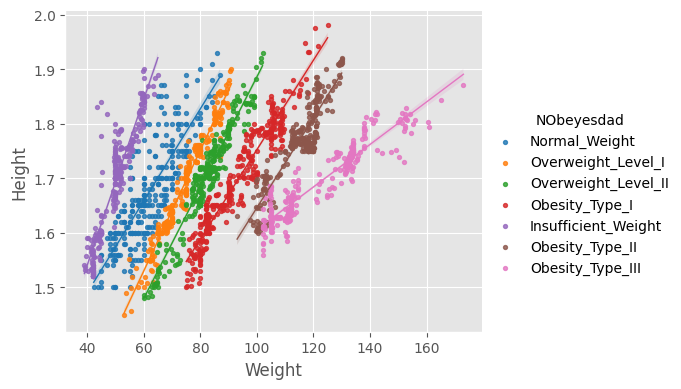

In [19]:
sns.lmplot(
    data=df,
    x="Weight",
    y="Height",
    height=4,
    aspect=1.3,
    hue="NObeyesdad",
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
    palette="tab10",
)
plt.show()

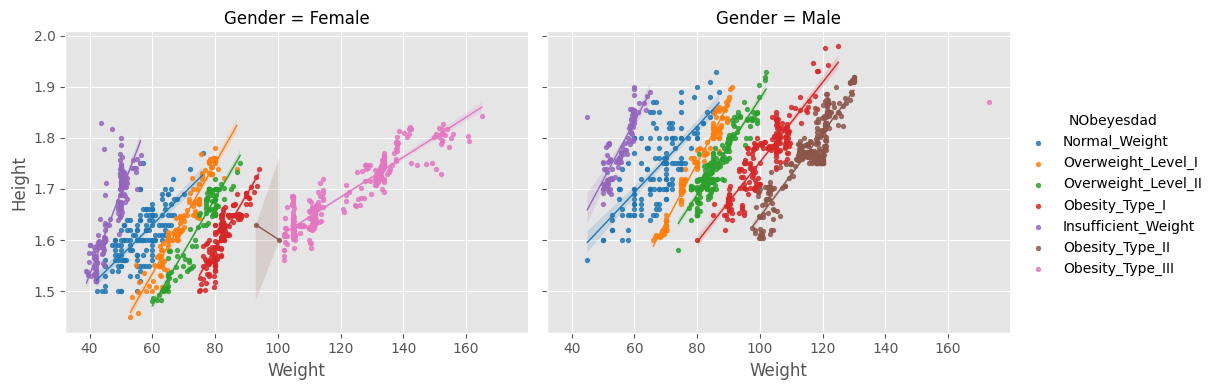

In [20]:
sns.lmplot(
    data=df,
    x="Weight",
    y="Height",
    col="Gender",
    height=4,
    aspect=1.3,
    hue="NObeyesdad",
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
    palette="tab10",
)
plt.show()

All of Obesity_Type_II (except 2 cases) comprises of the male gender, while all of
Obesity_Type_III (except 1 case) comprises of the Female Gender. It can also be noted that the
average height of the male is higher than that of the female.

# Correlation Plot

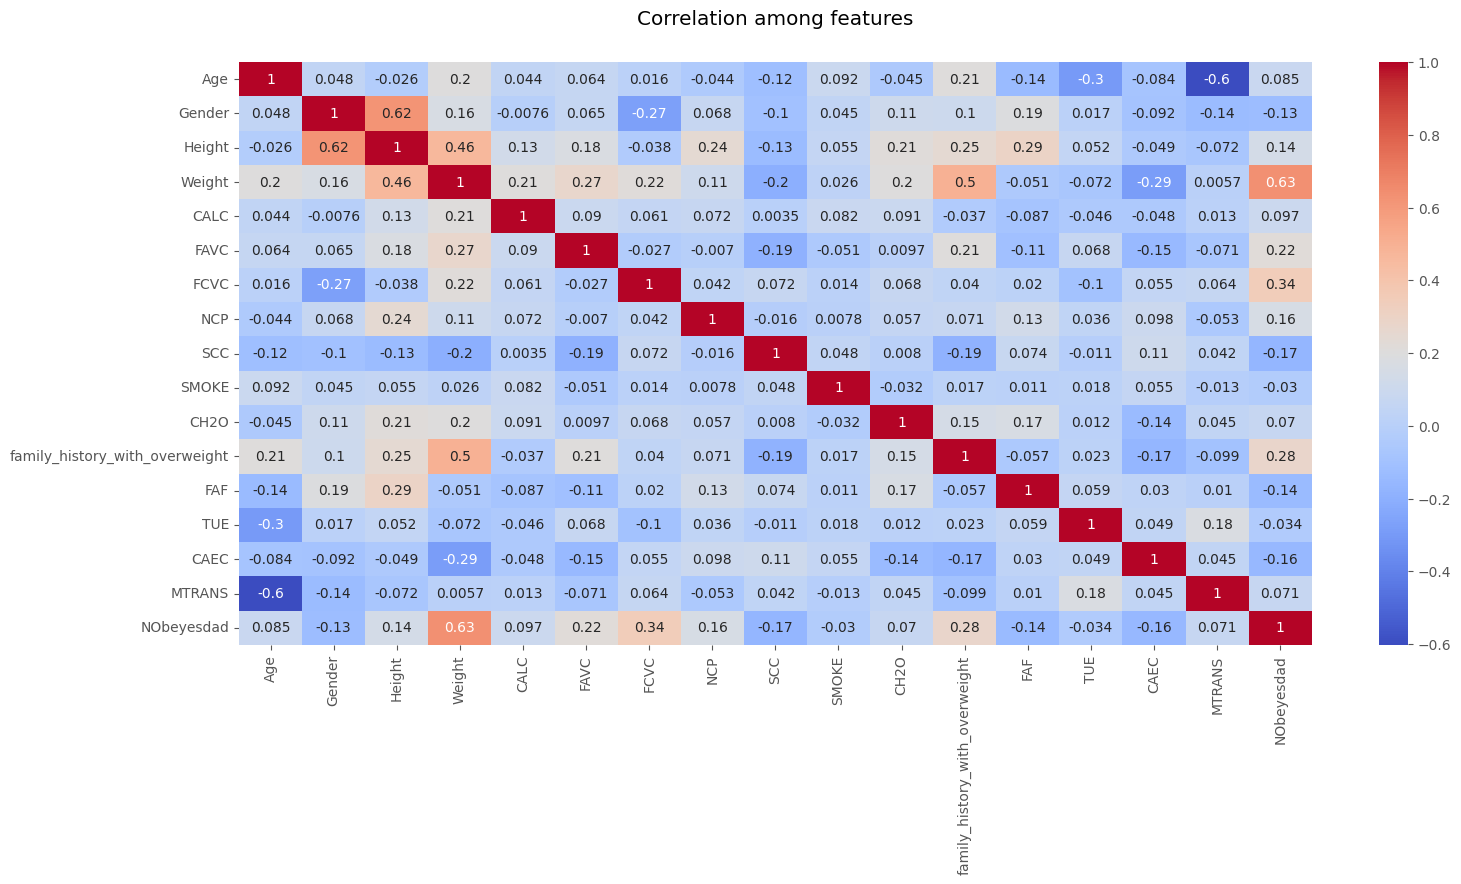

In [33]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
plt.title('Correlation among features',y= 1.05)
plt.tight_layout();
plt.show()

According to heat map it can be seen that there is strong correlation between weight and obesity levels

# Count PLOT

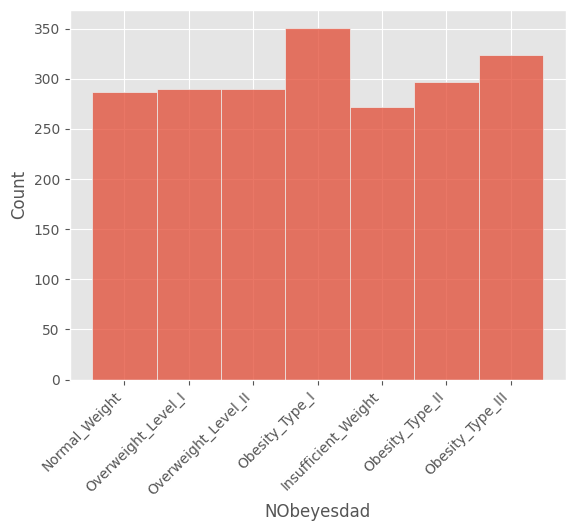

In [34]:
sns.histplot(data=df["NObeyesdad"])
plt.xticks(rotation=45, ha='right');

According to the plot above, the target variable is evenly distributed

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶  | </span><span style="color:#ff6200">Box Plot</span></b></h2>

To visualize the distribution of 'Height' and 'Weight' for each obesity level (NObeyesdad)

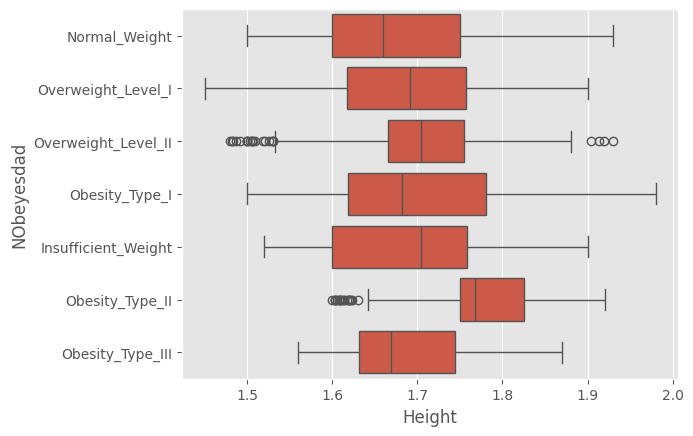

In [38]:
sns.boxplot(data=df, x="Height",y="NObeyesdad");

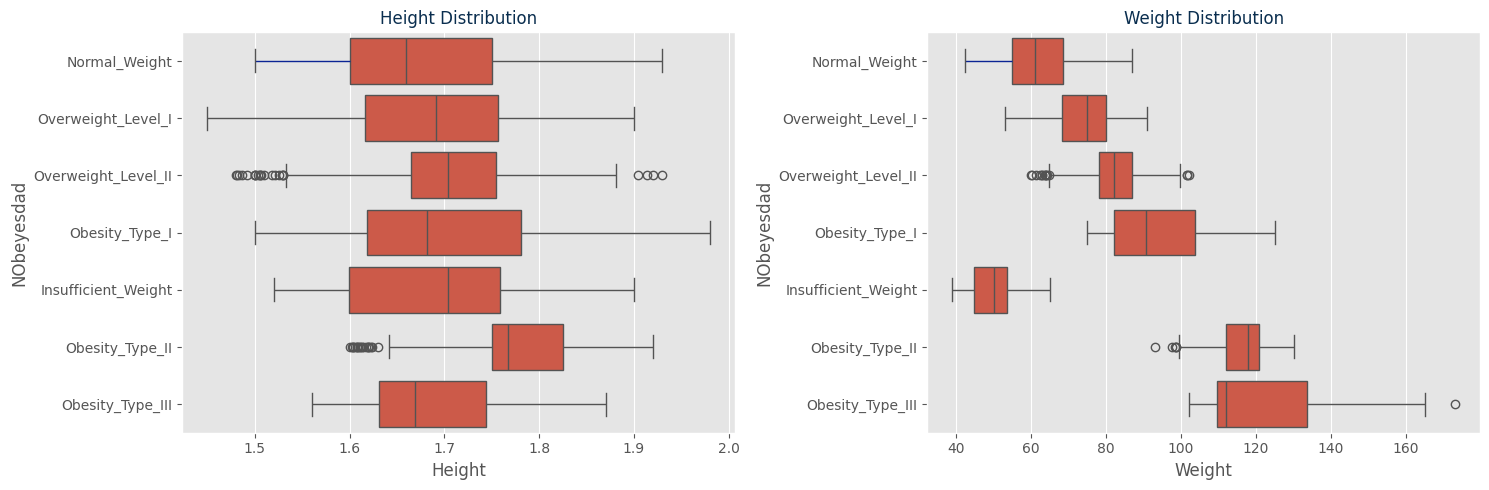

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.boxplot(
    data=df, x="Height",
    y="NObeyesdad",
    ax=ax[0],
)
ax2 = sns.boxplot(
    data=df, x="Weight",
    y="NObeyesdad",
    ax=ax[1],
)
ax1.set_title("Height Distribution", fontsize=12, color="#0a2e4f")
ax2.set_title("Weight Distribution", fontsize=12, color="#0a2e4f")
ax1.lines[0].set_color("#0b2494")
ax2.lines[0].set_color("#0b2494")
plt.tight_layout()
plt.show()

# Logistic Regression

In [62]:
x = df2.drop(columns=["NObeyesdad"])
y = df2["NObeyesdad"].values.reshape(-1, 1)


X_train_full, X_test, y_train_full, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state = 42)


In [63]:
# Base model
lrm = LogisticRegression( )
lrm.fit(X_train, y_train)

LogisticRegression()

In [66]:
confusion_matrix(y_val, lrm.predict(X_val) )
print(classification_report(y_val, lrm.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.53      0.45      0.49        42
         1.0       0.51      0.50      0.51        50
         2.0       0.50      0.41      0.45        49
         3.0       0.45      0.42      0.43        53
         4.0       0.80      0.85      0.82        47
         5.0       0.85      0.89      0.87        53
         6.0       0.75      1.00      0.85        44

    accuracy                           0.64       338
   macro avg       0.63      0.64      0.63       338
weighted avg       0.63      0.64      0.63       338



In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# X_train, y_train assumed to be prepared
# Multiclass setting: y has more than 2 classes

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        max_iter=1000,
        random_state=42
    ))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2', 'l1']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='roc_auc_ovr',   # One-vs-Rest ROC-AUC for multiclass
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

best_model = grid.best_estimator_


Best params: {'logreg__C': 10, 'logreg__penalty': 'l1'}
Best ROC-AUC: 0.9947734176691713


In [76]:
best_logreg = grid.best_estimator_
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)

In [77]:
roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr'
)

print("Test ROC-AUC:", roc_auc)

Test ROC-AUC: 0.9979625448772477


# Random Forest

In [81]:
# Baseline Random forest


rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)

RandomForestClassifier()

In [82]:

confusion_matrix(y_test, rfm.predict(X_test) )

array([[58,  3,  1,  0,  0,  0,  0],
       [ 5, 50,  1,  0,  0,  0,  0],
       [ 0,  2, 48,  0,  0,  0,  0],
       [ 1,  0,  1, 74,  0,  2,  0],
       [ 3,  0,  0,  0, 53,  0,  0],
       [ 0,  0,  0,  1,  0, 57,  0],
       [ 0,  0,  0,  0,  0,  0, 63]])

In [83]:
# print(classification_report(y, rfm.predict(x)))

print(classification_report(y_test, rfm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        62
         1.0       0.91      0.89      0.90        56
         2.0       0.94      0.96      0.95        50
         3.0       0.99      0.95      0.97        78
         4.0       1.00      0.95      0.97        56
         5.0       0.97      0.98      0.97        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [84]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    rf,
    param_grid,
    scoring='roc_auc_ovr',   # Multiclass ROC-AUC
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)
print("Best ROC-AUC:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC: 0.9956500715357883


In [85]:
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)


In [86]:
roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr'
)

print("Test ROC-AUC:", roc_auc)

Test ROC-AUC: 0.9970497779255579


Due to computational power we go for Logistic regression